In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
from matplotlib import pyplot as plt

Read in transaction and item data, merge

In [2]:
trans = pd.read_csv('D:/mgr/amexpert/customer_transaction_data.csv')

In [3]:
items = pd.read_csv('D:/mgr/amexpert/item_data.csv')

In [4]:
data = pd.merge(trans, items, on='item_id', how='left')

Category sizes

In [5]:
data.groupby('category').size()

category
Alcohol                     1343
Bakery                     18218
Dairy, Juices & Snacks     20465
Flowers & Plants            1602
Fuel                       13797
Garden                       413
Grocery                   942176
Meat                       23056
Miscellaneous               3197
Natural Products           52981
Packaged Meat              66110
Pharmaceutical            155245
Prepared Food              13069
Restauarant                  211
Salads                       429
Seafood                     7043
Skin & Hair Care            4868
Travel                       247
Vegetables (cut)              96
dtype: int64

In [6]:
meat = data.loc[data['category'] == 'Packaged Meat', :]

Packaged meat category overview: # of unique records per column (variable)

In [7]:
meat.apply(lambda x: len(x.unique()), 0)

date                548
customer_id        1560
item_id            1966
quantity             14
selling_price       610
other_discount      427
coupon_discount      30
brand               143
brand_type            2
category              1
dtype: int64

Read in customer demographics and merge

In [8]:
cust_info = pd.read_csv('D:/mgr/amexpert/customer_demographics.csv')

In [9]:
data = pd.merge(meat, cust_info, how='left', on='customer_id')

In [10]:
data.shape

(66110, 16)

In [11]:
data.apply(lambda x: x.isna().mean(), 0)

date               0.000000
customer_id        0.000000
item_id            0.000000
quantity           0.000000
selling_price      0.000000
other_discount     0.000000
coupon_discount    0.000000
brand              0.000000
brand_type         0.000000
category           0.000000
age_range          0.437180
marital_status     0.689351
rented             0.437180
family_size        0.437180
no_of_children     0.800015
income_bracket     0.437180
dtype: float64

Leaving customers with complete demographics will cut dataset size by 43% (excluding marital status). # of children is to an extent redundant with family size

In [12]:
pure = data.dropna(subset=['age_range'])

In [13]:
pure.apply(lambda x: x.isna().mean(), 0)

date               0.000000
customer_id        0.000000
item_id            0.000000
quantity           0.000000
selling_price      0.000000
other_discount     0.000000
coupon_discount    0.000000
brand              0.000000
brand_type         0.000000
category           0.000000
age_range          0.000000
marital_status     0.448049
rented             0.000000
family_size        0.000000
no_of_children     0.644673
income_bracket     0.000000
dtype: float64

In [37]:
pure.shape

(37208, 16)

This operation leaves >37k rows in the dataset. # of unique entries in each column presented below

In [14]:
pure.apply(lambda x: len(x.unique()), 0)

date                547
customer_id         751
item_id            1450
quantity             13
selling_price       513
other_discount      364
coupon_discount      27
brand               127
brand_type            2
category              1
age_range             6
marital_status        3
rented                2
family_size           5
no_of_children        4
income_bracket       12
dtype: int64

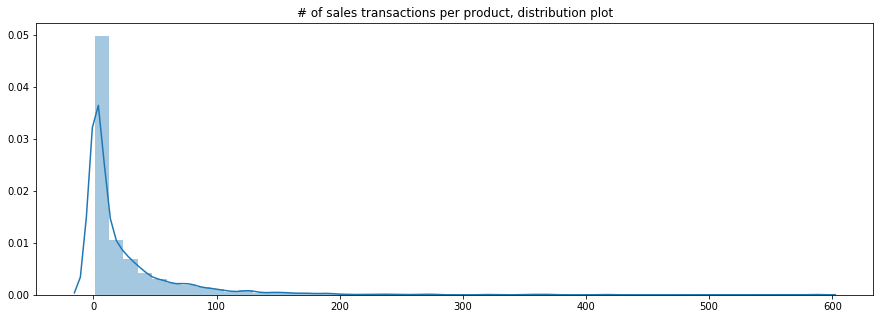

In [21]:
plt.figure(figsize = (15,5))
sns.distplot(pure.groupby('item_id').size())
plt.title('# of sales transactions per product, distribution plot');

There are plenty of products with more than 100 sales transactions in the sample.

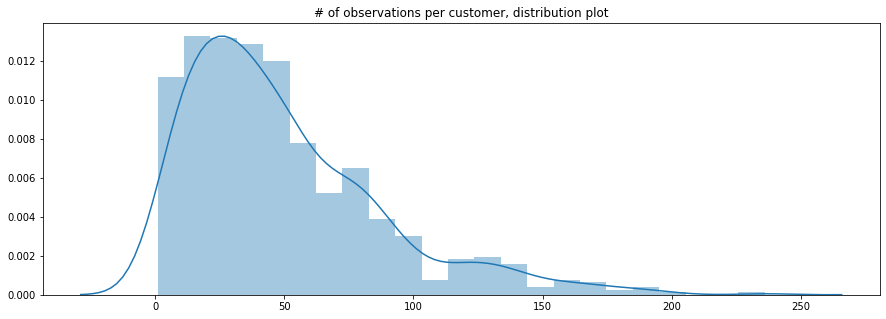

In [22]:
plt.figure(figsize = (15,5))
sns.distplot(pure.groupby('customer_id').size())
plt.title('# of observations per customer, distribution plot');

Filtering out customers with less than 3 sales transactions (some of the reference price measures proposed in the literature are history-based) is not expected to materially change sample size.

**Dropping customers with less than 3 sales transactions in "Packaged Meat" category**

In [53]:
pure = pd.merge(pure, pure.groupby('customer_id').size().rename('n_trips'), how='left', on='customer_id')

In [55]:
pure = pure.loc[pure['n_trips'] > 2, :]

Characteristics of the reduced dataset

In [56]:
pure.apply(lambda x: x.nunique(), 0)

date                547
customer_id         742
item_id            1450
quantity             13
selling_price       513
other_discount      364
coupon_discount      27
brand               127
brand_type            2
category              1
age_range             6
marital_status        2
rented                2
family_size           5
no_of_children        3
income_bracket       12
n_trips             145
dtype: int64

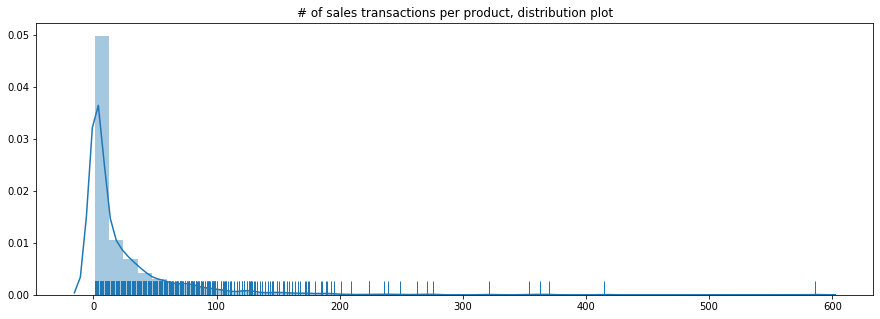

In [23]:
plt.figure(figsize = (15,5))
sns.distplot(pure.groupby('item_id').size(), rug=True)
plt.title('# of sales transactions per product, distribution plot');

In fact, there is a number of products exceeding even the 200 threshold.

**Dropping products with no more than 200 transactions registered**

In [60]:
pure = pd.merge(pure, pure.groupby('item_id').size().rename('n_trans'), how='left', on='item_id')

In [63]:
pure.loc[pure['n_trans'] > 200, :].shape

(4798, 18)

Reduced dataset contains almost 4800 observations on 533 distinct dates, 625 customers and 16 products by 8 brands, both local and established (the only two brand type categories in the entire dataset)

In [64]:
pure.loc[pure['n_trans'] > 200, :].apply(lambda x: x.nunique(), 0)

date               533
customer_id        625
item_id             16
quantity             7
selling_price      113
other_discount     110
coupon_discount      8
brand                8
brand_type           2
category             1
age_range            6
marital_status       2
rented               2
family_size          5
no_of_children       3
income_bracket      12
n_trips            144
n_trans             15
dtype: int64

In [65]:
pure = pure.loc[pure['n_trans'] > 200, :]

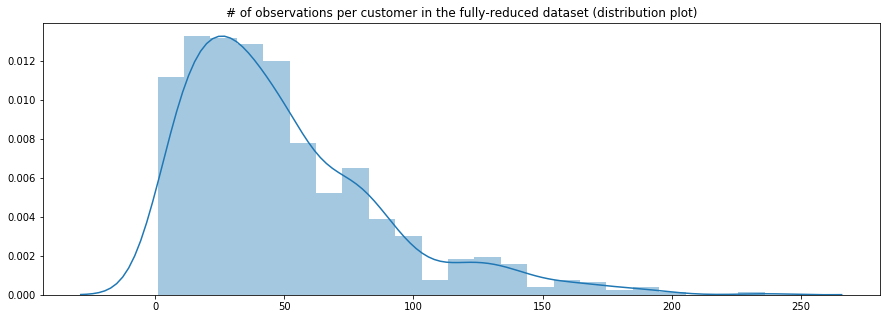

In [25]:
plt.figure(figsize=(15,5))
sns.distplot(pure.groupby('customer_id').size())
plt.title('# of observations per customer in the fully-reduced dataset (distribution plot)');